# **Heart** **Failure** **Analysis**

In [95]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Importing the dataset

dataset = pd.read_csv('dataset.csv')

## **Dataset**



01.    **Age** : age of the patient [years]
02.    **Anaemia** : Decrease of red blood cells or hemoglobin (boolean)
3.   **creatine_phosphokinase** : Level of the CPK enzyme in the blood (mcg/L)
4.   **diabetes** : If the patient has diabetes (boolean)
5.   **ejection_fraction** : Percentage of blood leaving the heart at each contraction (percentage)
6.   **high_blood_pressure** : If the patient has hypertension (boolean
7.   **platelets** : Platelets in the blood (kiloplatelets/mL)
8.   **serum_creatine** : Level of serum creatinine in the blood (mg/dL)
9.   **serum_sodium** : Level of serum sodium in the blood (mEq/L)
10.  **sex** : Woman or man (binary)
11.  **smoking** : If the patient smokes or not (boolean)
12.   **time** : Follow-up period (days)
13.   **DEATH_EVENT** : If the patient deceased during the follow-up period (boolean)






















### CREATINE PHOSPHOKINASE
 
*   When the total CPK(CREATINE PHOSPHOKINASE) level is very high, it most often means there has been injury or stress to muscle tissue, the heart, or the brain. Muscle tissue injury is most likely.
*    When a muscle is damaged, CPK leaks into the bloodstream. Finding which specific form of CPK is high helps determine which tissue has been damaged.

In [97]:
# Lets look at the top 5 rows
dataset.head()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [98]:
# Checking for null values
dataset.isnull().sum()

age                       0
anaemia                   0
creatine_phosphokinase    0
diabetes                  0
ejection_fraction         0
high_blood_pressure       0
platelets                 0
serum_creatine            0
serum_sodium              0
sex                       0
smoking                   0
time                      0
DEATH_EVENT               0
dtype: int64

In [99]:
dataset.describe()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000




---



---


# **Finding Outliers**

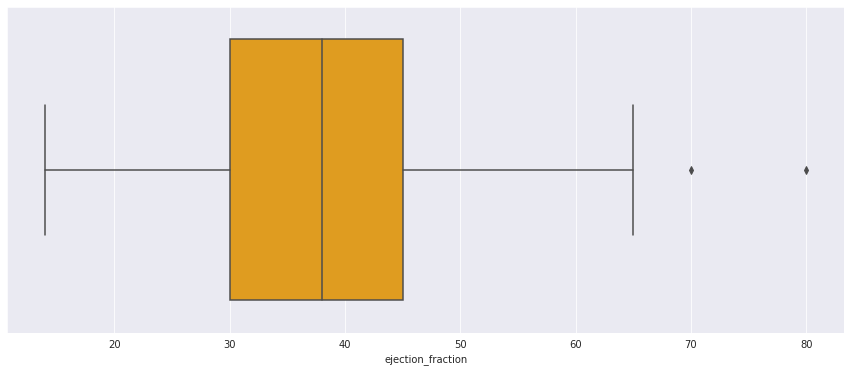

In [100]:
# Boxplot for ejection_fraction

sns.boxplot(x = dataset.ejection_fraction, color = 'orange')
plt.show()

In [101]:
# We can see there are two outliers. Lets remove them
dataset[dataset['ejection_fraction']>=70]

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [102]:
dataset = dataset[dataset['ejection_fraction']<70]

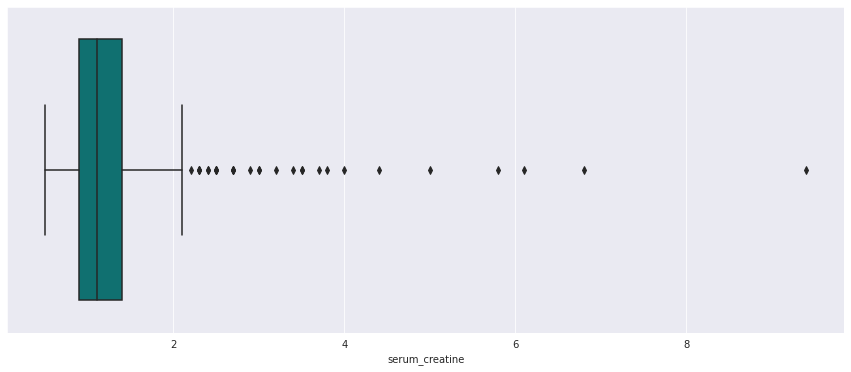

In [103]:
# Boxplot for serum_creatine
sns.boxplot(x=dataset.serum_creatine, color = 'teal')
plt.show()

In [104]:
# Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
# exist within each feature, removing outliers becomes tricky.

#the values in serum_creatine falls in possible range of values. So they are not outliers. 
# They are actual data points that helps in predicting DEATH_EVENT.""



---



---


# **INSIGHTS OF THE DATASET**

In [105]:
# Hover over the graph to get the count of people of different age groups

In [106]:
# Now lets categorize the above histogram by AGE vs DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="rug", hover_data=dataset.columns, 
                   title ="Histogram for AGE vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [107]:
# Now lets categorize the above histogram by SERUM CREATINE vs DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatine", color="DEATH_EVENT", marginal="rug", hover_data=dataset.columns,
                   title ="Histogram for SERUM CREATINE vs DEATH_EVENT", 
                   labels={"serum_creatine": "SERUM CREATINE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

### EJECTION FRACTION


*   Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat
*   An ejection fraction measurement under 40 percent may be evidence of heart failure or cardiomyopathy.



In [108]:
# Now lets categorize the above histogram by EJECTION FEACTION vs DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="rug", hover_data=dataset.columns,
                   title ="Distribution of EJECTION FRACTION vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

### PLATELETS COUNT


*   Platelets are specialized disk-shaped cells in the blood stream that are involved in the formation of blood clots that play an important role in heart attacks, strokes, and peripheral vascular disease.
*   Too many platelets can lead to certain conditions, including stroke, heart attack or a clot in the blood vessels of heart.



In [109]:
# Now lets categorize the above histogram by  PLATELETS vs DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="rug", hover_data=dataset.columns,
                   title ="Distribution of PLATELETS vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

### SERUM SODIUM



*   Hyponatremia or low serum sodium level is typically defined as a serum sodium concentration of <135 mEq/L and is one of the most common biochemical disorders featured in heart failure patients, with a prevalence close to 25% [2–4]. 
*   HF affects cardiac output by either decreasing heart rate or reducing the stroke volume.|



In [110]:
# Now lets categorize the above histogram by SERUM SODIUM vs DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="rug",hover_data=dataset.columns,
                   title ="Distribution of SERUM SODIUM vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()



---



---


#  ***PIE CHARTS***






### DIABETES DISTRIBUTION & DEATH_EVENT COMPARSION

In [111]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

### HIGH BP DISTRIBUTION & DEATH_EVENT COMPARSION

In [112]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label")

fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

### SMOKING DISTRIBUTION & DEATH_EVENT COMPARSION

In [113]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==1)]

label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking - Survived','No Smoking - Died', "Smoking - Survived", "Smoking - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label")

fig.update_layout(
    title_text="SMOKING DISTRIBUTION IN THE DATASET \
                  SMOKING VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKING VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [114]:
x = dataset.iloc[:, [4,7,11]].values
y = dataset.iloc[:,-1].values

### In the dataset time signifies follow-up period which indicates a person's health over a period of time after a clinical study is made. 

In [115]:
print(x)

[[ 20.     1.9    4.  ]
 [ 38.     1.1    6.  ]
 [ 20.     1.3    7.  ]
 [ 20.     1.9    7.  ]
 [ 20.     2.7    8.  ]
 [ 40.     2.1    8.  ]
 [ 15.     1.2   10.  ]
 [ 60.     1.1   10.  ]
 [ 65.     1.5   10.  ]
 [ 35.     9.4   10.  ]
 [ 38.     4.    10.  ]
 [ 25.     0.9   10.  ]
 [ 30.     1.1   11.  ]
 [ 38.     1.1   11.  ]
 [ 30.     1.    12.  ]
 [ 50.     1.3   13.  ]
 [ 38.     0.9   14.  ]
 [ 14.     0.8   14.  ]
 [ 25.     1.    15.  ]
 [ 55.     1.9   15.  ]
 [ 25.     1.3   16.  ]
 [ 30.     1.6   20.  ]
 [ 35.     0.9   20.  ]
 [ 60.     0.8   22.  ]
 [ 30.     1.83  23.  ]
 [ 38.     1.9   23.  ]
 [ 40.     1.    24.  ]
 [ 45.     1.3   26.  ]
 [ 38.     5.8   26.  ]
 [ 30.     1.2   26.  ]
 [ 38.     1.83  27.  ]
 [ 45.     3.    28.  ]
 [ 35.     1.    28.  ]
 [ 30.     1.2   29.  ]
 [ 50.     1.    29.  ]
 [ 35.     3.5   30.  ]
 [ 50.     1.    30.  ]
 [ 50.     1.    30.  ]
 [ 30.     2.3   30.  ]
 [ 38.     3.    30.  ]
 [ 20.     1.83  31.  ]
 [ 30.     1.2  

In [116]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


## **SPLITTING THE DATASET INTO TRAIN & TEST SETS**

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [118]:
print(x_train)

[[ 40.     0.8  250.  ]
 [ 25.     2.5   77.  ]
 [ 35.     1.3   88.  ]
 [ 60.     1.   113.  ]
 [ 35.     0.7  197.  ]
 [ 25.     1.3   16.  ]
 [ 25.     0.9   38.  ]
 [ 35.     0.8  120.  ]
 [ 60.     1.4  205.  ]
 [ 35.     1.1  208.  ]
 [ 45.     1.3   26.  ]
 [ 20.     1.83 198.  ]
 [ 25.     0.8  230.  ]
 [ 50.     1.    30.  ]
 [ 25.     1.7   82.  ]
 [ 40.     1.2  121.  ]
 [ 45.     1.    80.  ]
 [ 40.     0.9  244.  ]
 [ 50.     1.3  121.  ]
 [ 35.     1.8  186.  ]
 [ 30.     1.3  212.  ]
 [ 50.     1.1  209.  ]
 [ 40.     1.2   74.  ]
 [ 25.     1.   205.  ]
 [ 40.     1.   140.  ]
 [ 35.     1.   206.  ]
 [ 25.     1.2   85.  ]
 [ 60.     1.1   33.  ]
 [ 35.     1.3  212.  ]
 [ 25.     1.2  154.  ]
 [ 35.     0.8  145.  ]
 [ 40.     1.   147.  ]
 [ 38.     2.2   45.  ]
 [ 60.     0.9  107.  ]
 [ 25.     1.    15.  ]
 [ 45.     0.9  174.  ]
 [ 25.     2.4  214.  ]
 [ 60.     3.2   94.  ]
 [ 38.     1.83  95.  ]
 [ 35.     1.    72.  ]
 [ 35.     1.   108.  ]
 [ 35.     1.1  

In [119]:
print(y_train)

[0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [120]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)
print(x_test1)

[[-1.09630438  0.21823117 -0.48797068]
 [ 1.96147801 -0.51480287 -0.13562083]
 [-0.65947832 -0.30536457 -1.51892025]
 [-0.22265227 -0.30536457  0.90837873]
 [ 0.03944337 -0.30536457 -0.24002079]
 [-1.53313044 -0.72424116 -0.70982059]
 [-0.22265227 -0.61952201  0.77787879]
 [ 1.96147801 -0.30536457  0.24282901]
 [ 0.21417379 -0.41008372  0.58212887]
 [-0.22265227 -0.09592627  0.88227875]
 [-1.53313044 -0.20064542 -0.70982059]
 [ 1.0878259  -0.09592627 -1.49282026]
 [-0.22265227 -0.41008372  1.52172848]
 [-0.22265227 -0.51480287 -0.51407067]
 [-0.22265227 -0.51480287 -1.4014703 ]
 [-1.09630438 -0.09592627  1.01277869]
 [ 0.03944337 -0.51480287  1.52172848]
 [ 0.65099984 -0.41008372  1.14327864]
 [-0.65947832 -0.93367946  1.13022864]
 [-1.09630438  0.74182691 -0.25307078]
 [-1.53313044  1.57958009 -0.82727054]
 [ 1.96147801 -0.61952201 -0.30527076]
 [ 0.65099984 -0.22158925  1.09107866]
 [ 0.65099984 -0.72424116  0.76482879]
 [ 0.65099984 -0.61952201 -0.61847063]
 [ 2.13620844  5.66362686

## ***LOGISTIC REGRESSION***

In [121]:
# Applying logistic regression on the training set

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [122]:
# Predicting the test set

y_pred = logreg.predict(x_test)

In [123]:
#calculating accuracy score
mylist=[]
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(ac)

0.8833333333333333


# ***K NEAREST NEIGHBORS***

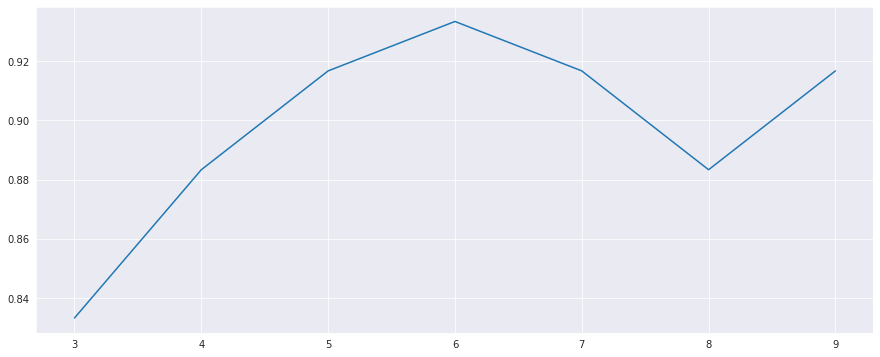

In [124]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train1, y_train)
    y_pred = classifier.predict(x_test1)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [125]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train1, y_train)

KNeighborsClassifier(n_neighbors=6)

In [126]:
# Predicting the Test set results

y_pred = classifier.predict(x_test1)
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [127]:
# calculating accuracy score

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(ac)

0.9333333333333333


# SUPPORT VECTOR CLASSIFIER

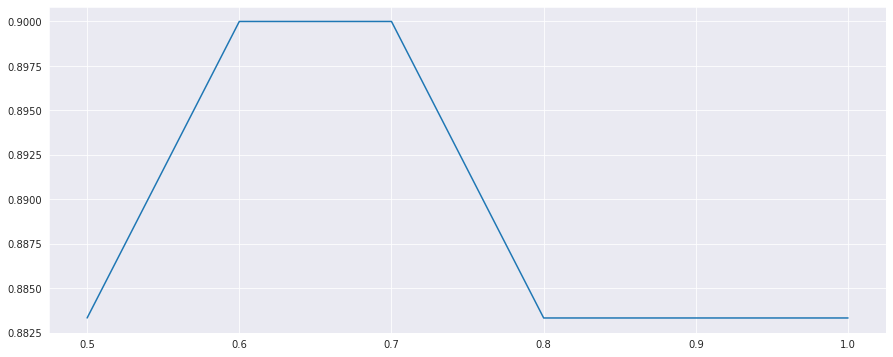

In [128]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train1, y_train)
    y_pred = classifier.predict(x_test1)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [129]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.6, random_state=0, kernel = 'rbf')
classifier.fit(x_train1, y_train)

SVC(C=0.6, random_state=0)

In [130]:
# Predicting the test set results

y_pred = classifier.predict(x_test1)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0]


In [131]:
#calculating accuracy score

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)
mylist.append(ac)


0.9


# **DECISION TREE CLASSIFIER**

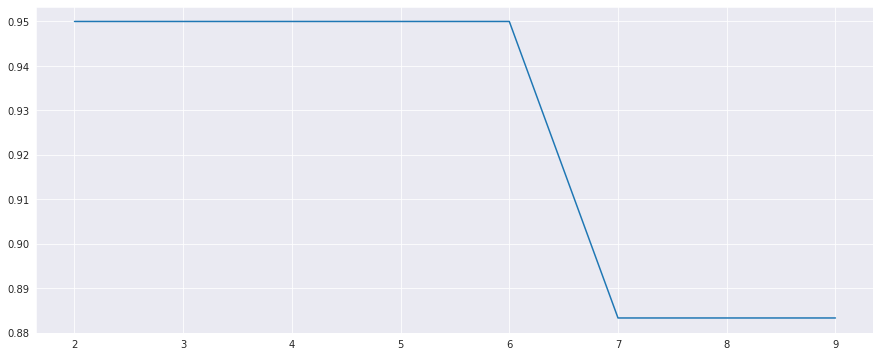

In [132]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
list1 = []
for leaves in range(2,10):
    dectree = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    dectree.fit(x_train, y_train)
    y_pred = dectree.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [133]:
# Training the Decision Tree Classifier on the Training set

dectree = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
dectree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [134]:
# Predicting the test set results

y_pred = dectree.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [135]:
# calculating accuracy score

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)
mylist.append(ac)

0.95


# **RANDOM FOREST REGRESSION**

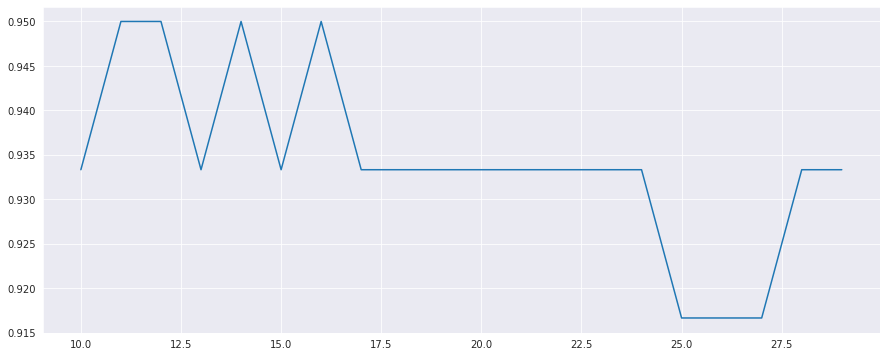

In [136]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
list1 = []
for estimators in range(10,30):
    randfor = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    randfor.fit(x_train, y_train)
    y_pred = randfor.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [137]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
randfor.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [138]:
# Predicting the test set results

y_pred = randfor.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [139]:
#calculating the accuracy score

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(ac)

0.95


## ***PLOTTING ACCURACY SCORE OF DIFFERENT MODELS***


In [140]:
mylist2 = ["Logistic Regression", "KNearestNeighbours","SupportVector","DecisionTree","RandomForest"]

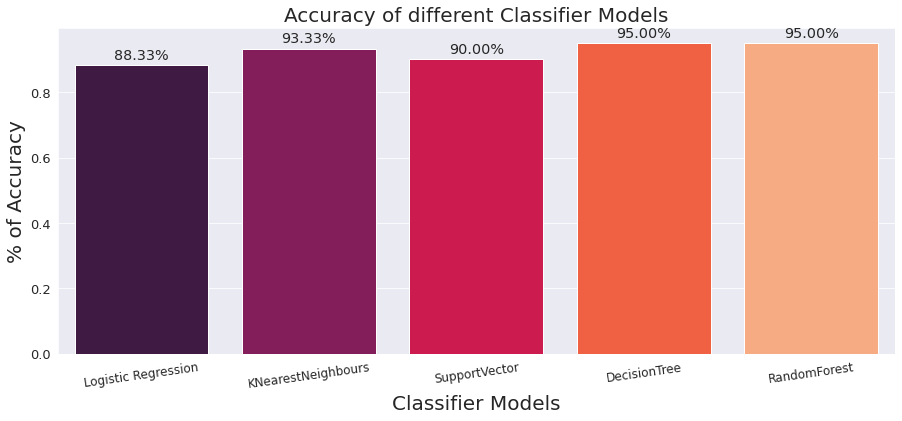

In [141]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()